<a href="https://colab.research.google.com/github/cpython-projects/python_da_06_11_25/blob/main/lesson_19_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Легенда

**[Students Performance in Exams](https://github.com/cpython-projects/python_da_06_11_25/blob/main/StudentsPerformance.csv)**

Датасет містить інформацію про результати учнів та деякі соціальні характеристики, які можуть впливати на успішність.

## Опис змінних

* **gender** — стать учня
* **race/ethnicity** — етнічна група учня
* **parental level of education** — рівень освіти батьків
* **lunch** — тип харчування в школі
* **test preparation course** — чи проходив учень підготовчий курс перед іспитом
* **math score** — бал за іспит з математики
* **reading score** — бал за іспит з читання
* **writing score** — бал за іспит з письма

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cpython-projects/python_da_06_11_25/refs/heads/main/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.columns.to_list()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

# Task 1  

> З якими результатами з математики учні стикаються найчастіше:
> чи більше учнів отримують середні бали, чи результати зосереджені біля мінімуму або максимуму?

<Axes: >

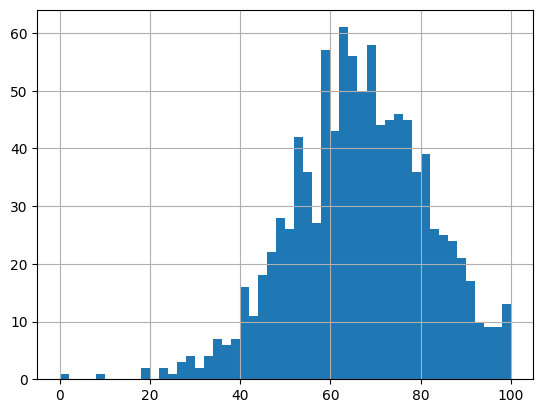

In [4]:
df['math score'].hist(bins=50)

In [5]:
df['math score'].mode()

,math score
0,65


In [6]:
df['math score'].mean()

np.float64(66.089)

# Task 2  

> Порівняти середній бал з читання для учнів, які проходили підготовчий курс перед іспитом, і тих, хто його не проходив.
> Яка група виглядає успішнішою?

<Axes: >

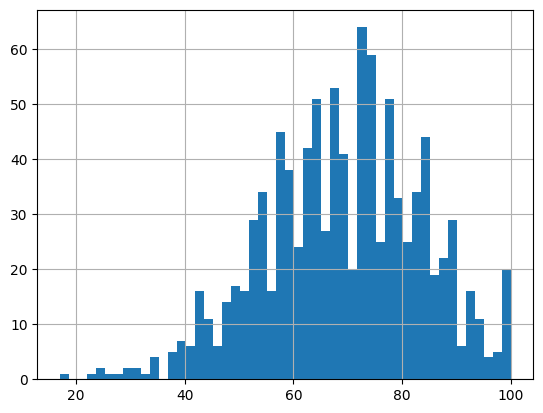

In [9]:
df['reading score'].hist(bins=50)

In [10]:
df_reading = df[df['reading score'] > 20]

array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

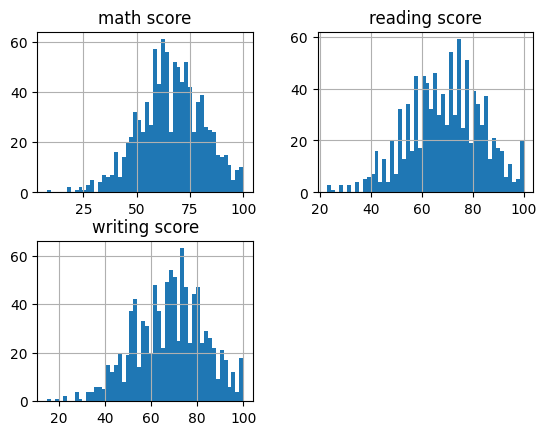

In [11]:
df_reading.hist(bins=50)

In [12]:
df_reading_grouped = df_reading.groupby('test preparation course')['reading score'].mean()
df_reading_grouped

,reading score
test preparation course,
completed,73.893855
none,66.611544


# Task 3  

> Як відрізняється розподіл балів з письма між учнями з різним рівнем освіти батьків?
> У яких групах результати більш стабільні, а де — сильніше коливаються?

In [13]:
fig = px.box(
    df,
    x='parental level of education',
    y='writing score')
fig.show()

# Task 4  

> Як виглядає розташування учнів на площині
> «бал з читання — бал з письма»?
> Чи є учні з нетиповими поєднаннями результатів?

In [15]:
fig = px.scatter(
    df,
    x='reading score',
    y='writing score',
)
fig.show()